Welcome to your Neural Networks programming assignment. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation


## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- cases provides some test examples to assess the correctness of your functions
- utils provide various useful functions used in this assignment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/MyDrive/딥러닝/3. Neural Network"

cp: missing destination file operand after '/content/drive/MyDrive/딥러닝/3. Neural Network'
Try 'cp --help' for more information.


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/딥러닝/3. Neural Network")
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/3. Neural Network',
 '/content/drive/MyDrive/딥러닝/3. Neural Network']

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from cases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from utils import plotDecisionBoundary, sigmoid, loadPlanarDataset, loadExtraDatasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `Y`.

In [ ]:
X, Y = loadPlanarDataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. <font color='yellow'>**Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.**

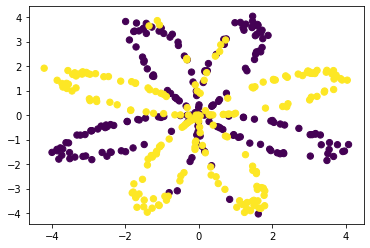

In [ ]:
plt.scatter(X[0,:],X[1,:], c=Y, s=40)

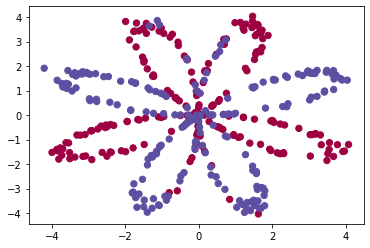

In [ ]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 




### Exercise 1
How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? 

**Hint**: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [ ]:
### START CODE HERE ### (≈ 3 lines of code)
shapeX = X.shape
shapeY = Y.shape
m = X.shape[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shapeX))
print ('The shape of Y is: ' + str(shapeY))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**Expected Output**:
       
<table style="width:20%">
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr>
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
</table>

## 3 - Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [ ]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


You can now plot the decision boundary of these models. Run the code below.

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


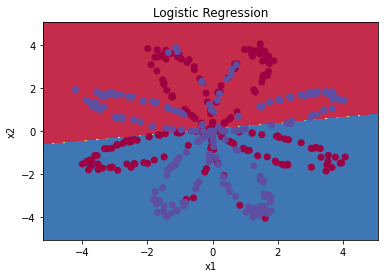

In [ ]:
# Plot the decision boundary for logistic regression
plotDecisionBoundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LRPredictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LRPredictions) + np.dot(1-Y,1-LRPredictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Expected Output**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 47% </td> 
  </tr>
  
</table>


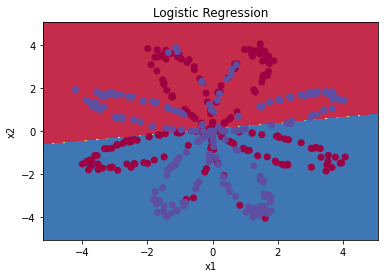

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
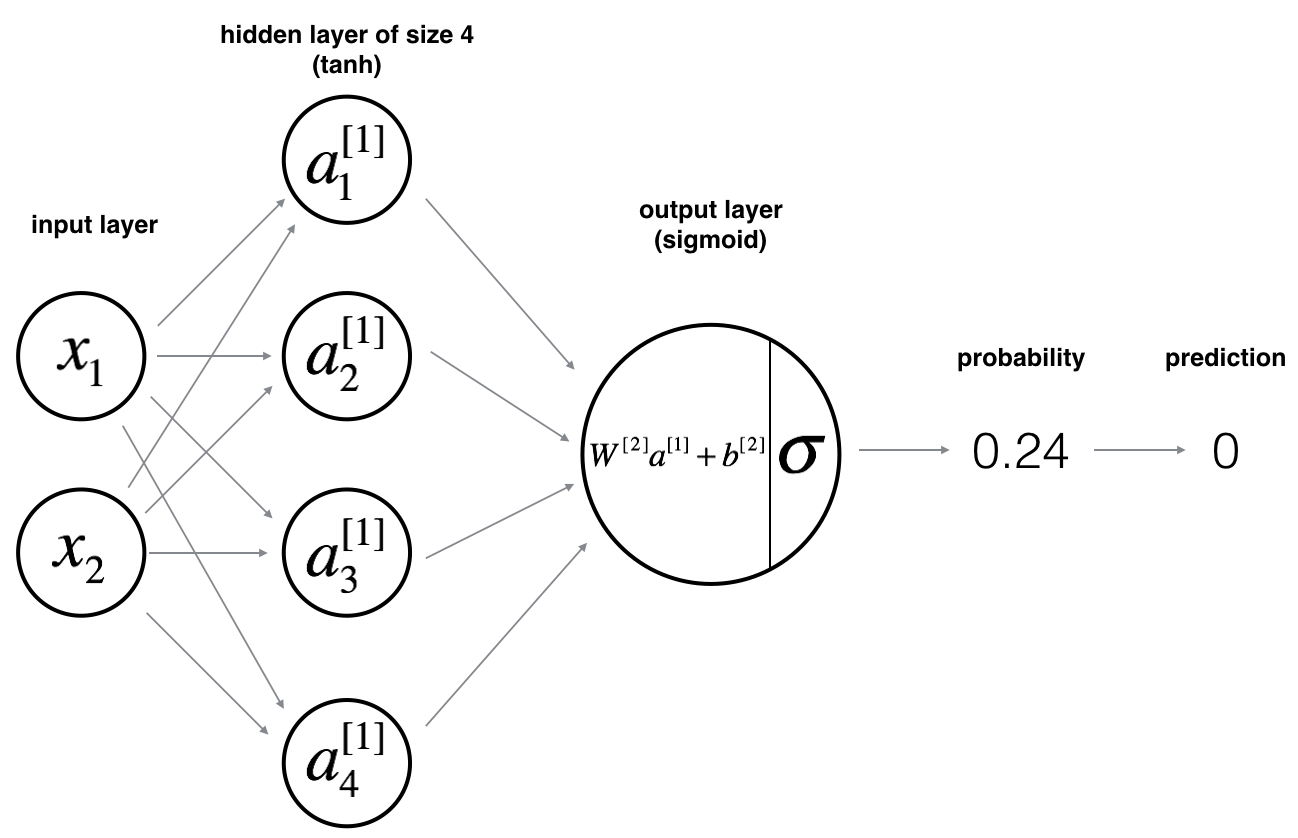

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nnModel()`. Once you've built `nnModel()` and learnt the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure ####



#### Exercise 2  - layerSizes
Define three variables:
> - nx: the size of the input layer
> - nh: the size of the hidden layer (set this to 4) 
> - ny: the size of the output layer

**Hint**: Use shapes of X and Y to find nx and ny. Also, hard code the hidden layer size to be 4.

In [ ]:
# GRADED FUNCTION: layerSizes

def layerSizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    nx -- the size of the input layer
    nh -- the size of the hidden layer
    ny -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    nx = X.shape[0]
    nh = 4
    ny = Y.shape[0]
    ### END CODE HERE ###
    return (nx, nh, ny)

In [ ]:
Xassess, Yassess = layerSizesTestCase()
(nx, nh, ny) = layerSizes(Xassess, Yassess)
print("The size of the input layer is: nx = " + str(nx))
print("The size of the hidden layer is: nh = " + str(nh))
print("The size of the output layer is: ny = " + str(ny))

The size of the input layer is: nx = 5
The size of the hidden layer is: nh = 4
The size of the output layer is: ny = 2


**Expected Output** (these are not the sizes you will use for your network, they are just used to assess the function you've just coded).

<table style="width:20%">
  <tr>
    <td>**nx**</td>
    <td> 5 </td> 
  </tr>
    <tr>
    <td>**nh**</td>
    <td> 4 </td> 
  </tr>
    <tr>
    <td>**ny**</td>
    <td> 2 </td> 
  </tr>
</table>

### 4.2 - Initialize the model's parameters ####



#### Exercise 3 - initializeParameters
Implement the function `initializeParameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [ ]:
# GRADED FUNCTION: initializeParameters

def initializeParameters(nx, nh, ny):
    """
    Argument:
    nx -- size of the input layer
    nh -- size of the hidden layer
    ny -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (nh, nx)
                    b1 -- bias vector of shape (nh, 1)
                    W2 -- weight matrix of shape (ny, nh)
                    b2 -- bias vector of shape (ny, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(nh,nx)*0.01
    b1 = np.zeros((nh,1))*0.01
    W2 = np.random.randn(ny,nh)*0.01
    b2 = np.zeros((ny,1))*0.01
    ### END CODE HERE ###
    
    assert (W1.shape == (nh, nx))
    assert (b1.shape == (nh, 1))
    assert (W2.shape == (ny, nh))
    assert (b2.shape == (ny, 1))
    
    ### START CODE HERE ###
    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    ### END CODE HERE ###
    
    return parameters

In [ ]:
nx, nh, ny = initializeParametersTestCase()

parameters = initializeParameters(nx, nh, ny)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**Expected Output**:

<table style="width:90%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>



### 4.3 - The Loop ####



#### Exercise 4 - forwardPropagation

Implement `forwardPropagation()` using the following equations:

$$Z^{[1]} =  W^{[1]} X + b^{[1]}\tag{1}$$ 
$$A^{[1]} = \tanh(Z^{[1]})\tag{2}$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}\tag{3}$$
$$\hat{Y} = A^{[2]} = \sigma(Z^{[2]})\tag{4}$$



**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initializeParameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $$Z^{[1]}, A^{[1]}, Z^{[2]}$$and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [ ]:
# GRADED FUNCTION: forwardPropagation

def forwardPropagation(X, parameters):
    """
    Argument:
    X -- input data of size (nx, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X)+b1
    print(Z1.shape)
    A1 = np.tanh(Z1)
    print(A1.shape)
    Z2 = np.dot(W2,A1)+b2
    print(Z2.shape)
    A2 = sigmoid(Z2)
    print(A2.shape)
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
    ### START CODE HERE ###
    cache = {"Z1":Z1,"A1":A1,"Z2":Z2,"A2":A2}
    ### END CODE HERE ###
    
    return A2, cache

In [ ]:
Xassess, parameters = forwardPropagationTestCase()
A2, cache = forwardPropagation(Xassess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

(4, 3)
(4, 3)
(1, 3)
(1, 3)
0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


**Expected Output**:
<table style="width:50%">
  <tr>
    <td> 0.262818640198 0.091999045227 -1.30766601287 0.212877681719 </td> 
  </tr>
</table>

### 4.4 - Compute the Cost


Now that you've computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for all examples, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

#### Exercise 5 - computeCost 

Implement `computeCost()` to compute the value of the cost $J$.


In [ ]:
# GRADED FUNCTION: computeCost

def computeCost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    # print((1-Y).shape)
    # print(np.log(1-A2).shape)
    logprobs = Y*(np.log(A2))+np.multiply((1-Y),np.log(1-A2))
    cost = -1/m * np.sum(logprobs)
    
    ### END CODE HERE ###
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [ ]:
A2, Yassess, parameters = computeCostTestCase()

print("cost = " + str(computeCost(A2, Yassess, parameters)))

cost = 0.6930587610394646


**Expected Output**:
<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.693058761... </td> 
  </tr>
  
</table>

### 4.5 - Implement Backpropagation
Using the cache computed during forward propagation, you can now implement backward propagation.

#### Exercise 6 - backwardPropagation
Implement the function `backwardPropagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

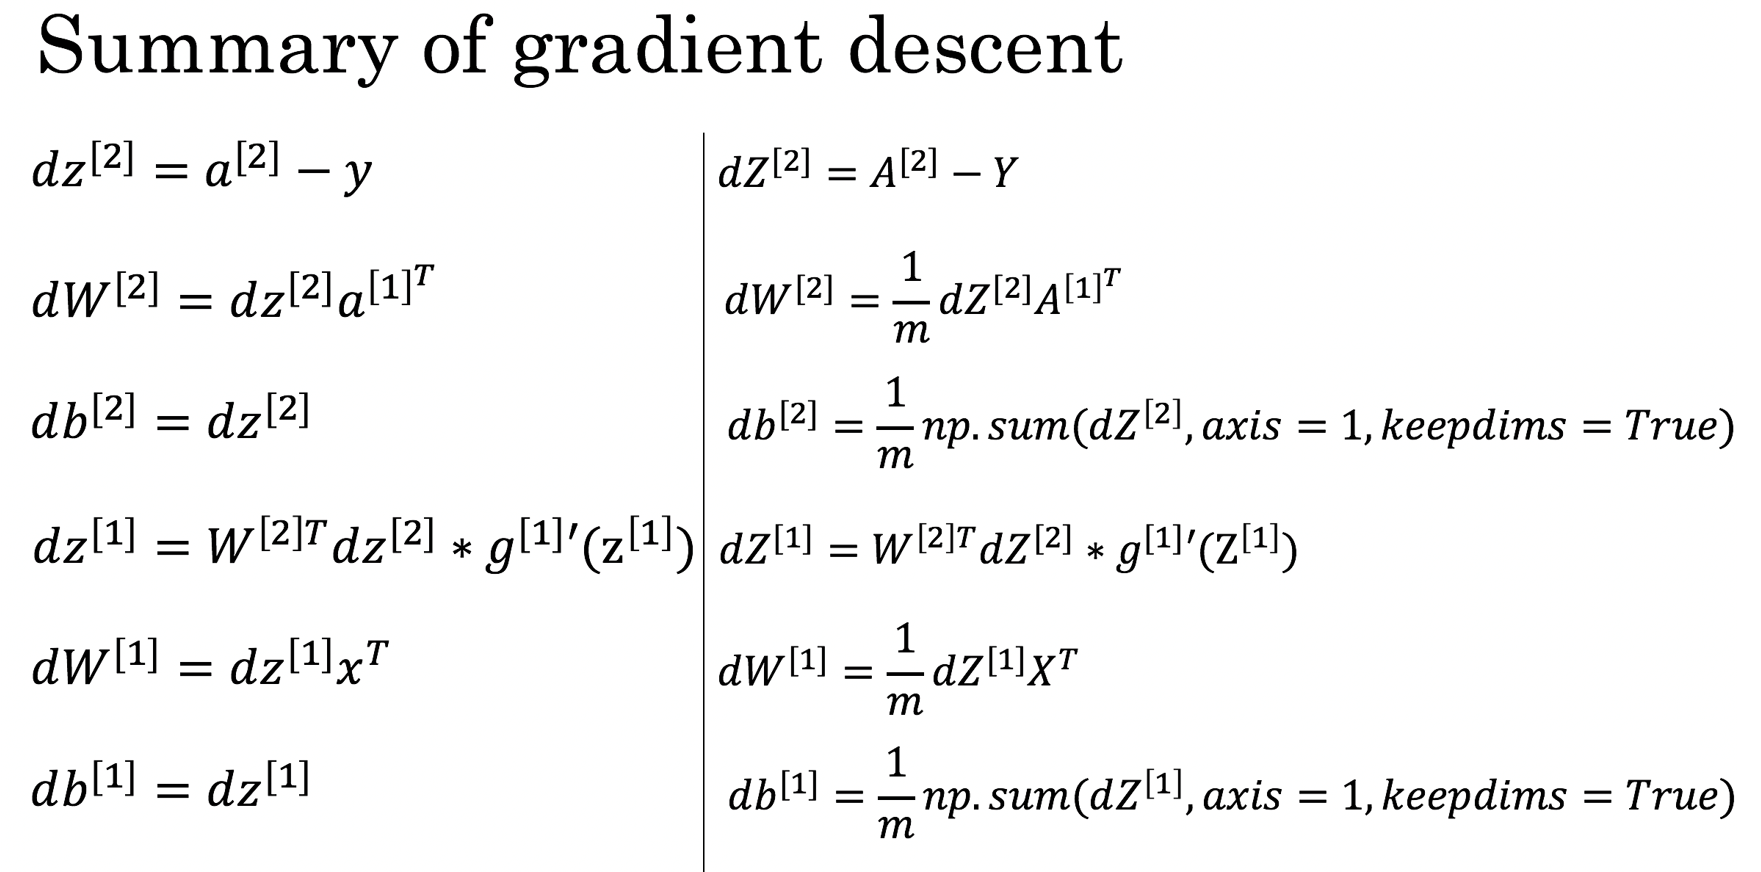

In [ ]:
# GRADED FUNCTION: backwardPropagation

def backwardPropagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    ### START CODE HERE ###
    m = X.shape[1]
    ### END CODE HERE ###

    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2 - Y
    dW2 = 1/m*(np.dot(dZ2,A1.T))
    db2 = 1/m*(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m*(np.dot(dZ1,X.T))
    db1 = 1/m*(np.sum(dZ1,axis=1,keepdims=True))
    ### END CODE HERE ###
    
    ### START CODE HERE ###
    grads = {"dW1":dW1,"db1":db1,"dW2":dW2,"db2":db2}
    ### END CODE HERE ###
    
    return grads

In [ ]:
parameters, cache, Xassess, Yassess = backwardPropagationTestCase()

grads = backwardPropagation(parameters, cache, Xassess, Yassess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Expected output**:



<table style="width:80%">
  <tr>
    <td>**dW1**</td>
    <td> [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]] </td> 
  </tr>
  
  <tr>
    <td>**db1**</td>
    <td>  [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]] </td> 
  </tr>
  
  <tr>
    <td>**dW2**</td>
    <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td> 
  </tr>
  

  <tr>
    <td>**db2**</td>
    <td> [[-0.16655712]] </td> 
  </tr>
  
</table>  

### 4.6 Update Parameters

#### Exercise 7 - update_parameters

Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $\theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

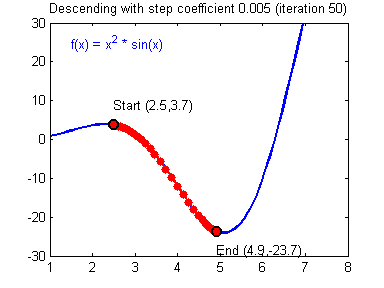

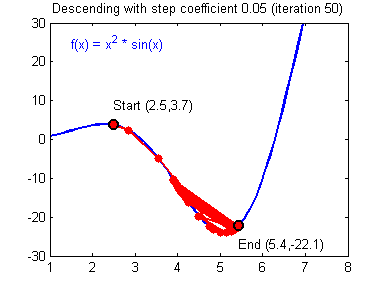

In [ ]:
# GRADED FUNCTION: updateParameters

def updateParameters(parameters, grads, learningRate):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learningRate*dW1
    b1 = b1 - learningRate*db1
    W2 = W2 - learningRate*dW2
    b2 = b2 - learningRate*db2
    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    ### END CODE HERE ###    
    
    return parameters

In [ ]:
parameters, grads = updateParametersTestCase()
parameters = updateParameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Expected Output**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td> 
  </tr>
  
</table>  

### 4.7 - Integration

Integrate your functions in `nnModel()` 




#### Exercise 8 - nnModel

Build your neural network model in `nnModel()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [ ]:
# nnModel
def nnModel(X, Y, nh, learningRate, numIterations = 10000, printCost=False):
    nx = layerSizes(X, Y)[0]
    ny = layerSizes(X, Y)[2]
    
    # YOUR CODE STARTS HERE    
    # Initialize parameters
    parameters = initializeParameters(nx, nh, ny)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # YOUR CODE ENDS HERE

    # Loop (gradient descent)
    for i in range(0, numIterations):

      # YOUR CODE ENDS HERE
      # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
      A2, cache = forwardPropagation(X,parameters)
      # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
      cost = computeCost(A2, Y, parameters)
      # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
      grads = backwardPropagation(parameters, cache, X, Y)
      # Update rule for each parameter
      parameters = updateParameters(parameters, grads, learningRate)
      # If print_cost=True, Print the cost every 1000 iterations
      # YOUR CODE ENDS HERE
      if printCost and i % 1000 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
      # Returns parameters learnt by the model. They can then be used to predict output

    return parameters


In [ ]:
Xassess, Yassess = nnModelTestCase()
parameters = nnModel(Xassess, Yassess, 4, 1.02,numIterations=10000, printCost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

**Expected Output**:

<table style="width:90%">

<tr> 
    <td> 
        **cost after iteration 0**
    </td>
    <td> 
        0.692739
    </td>
</tr>

<tr> 
    <td> 
        <center> $\vdots$ </center>
    </td>
    <td> 
        <center> $\vdots$ </center>
    </td>
</tr>

  <tr>
    <td>**W1**</td>
    <td> [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-2.45566237 -3.27042274  2.00784958  3.36773273]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.20459656]] </td> 
  </tr>
  
</table>  

## 5 - Test the Model



### 5.1 - Predict

#### Exercise 9 - predict

Predict with your model by building `predict()`.
Use forward propagation to predict results.



In [ ]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forwardPropagation(X,parameters)
    predictions = A2 > 0.5
    ### END CODE HERE ###
    
    return predictions

In [ ]:
A2

array([[0.5002307 , 0.49985831, 0.50023963]])

In [ ]:
parameters, Xassess = predictTestCase()

predictions = predict(parameters, Xassess)
print("predictions mean = " + str(np.mean(predictions)))

(4, 3)
(4, 3)
(1, 3)
(1, 3)
predictions mean = 0.6666666666666666


**Expected Output**: 


<table style="width:40%">
  <tr>
    <td>**predictions mean**</td>
    <td> 0.666666666667 </td> 
  </tr>
  
</table>

### 5.2 - Test the Model on the Planar Dataset

It's time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $nh$ hidden units!

In [ ]:
# Build a model with a n_h-dimensional hidden layer
parameters = nnModel(X, Y, 4, 1.2 , numIterations = 10000, printCost=True)

# Plot the decision boundary
plotDecisionBoundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

**Expected Output**:

<table style="width:40%">
  <tr>
    <td>**Cost after iteration 9000**</td>
    <td> 0.218607 </td> 
  </tr>
  
</table>


In [ ]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

(4, 400)
(4, 400)
(1, 400)
(1, 400)
Accuracy: 90%


In [ ]:
float((np.dot(Y,predictions.T)) + np.dot(1-Y,1-predictions.T) )/(Y.size)*100

90.75

**Expected Output**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

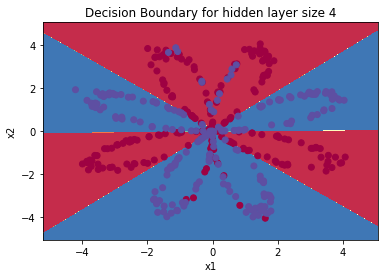